In [1]:
%reload_ext autoreload
%autoreload 2

In [16]:
import math
import features
import rapm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

FULL_SIMS = False

In [11]:
res = {}
activity = {}
nfeat = 6
ncorrect = 1
alpha = 0.1
temp = 0.1
nsims = 200
anticorrelated = True
nrules = 4
maxruns = 150
lowbounded = True

d_vals = [x / 100.0 for x in list(range(0, 201, 20))]

for d in d_vals:
    name = "%.1f" % d
    ps = rapm.Problem(nfeatures = nfeat, ncorrect = ncorrect,  nrules = nrules, maxruns = maxruns)
    ps.alpha = alpha
    ps.temperature = temp
    ps.anticorrelated = anticorrelated
    ps.lowbounded = lowbounded
    
    ps.d2 = d
    
    res[name] = []
    partial = []
    for n in range(nsims):
        solved = ps.solve()
        if solved:
            partial.append(1)
        else:
            partial.append(0)
    res[name].append(np.mean(partial))
    
d2_res = res

res = {}
for d in d_vals:
    name = "%.1f" % d
    ps = rapm.Problem(nfeatures = nfeat, ncorrect = ncorrect,  nrules = nrules, maxruns = maxruns)
    ps.alpha = alpha
    ps.temperature = temp
    ps.anticorrelated = anticorrelated
    ps.lowbounded = lowbounded
    
    ps.d1 = d
    
    res[name] = []
    partial = []
    for n in range(nsims):
        solved = ps.solve()
        if solved:
            partial.append(1)
        else:
            partial.append(0)
    res[name].append(np.mean(partial))

d1_res = res


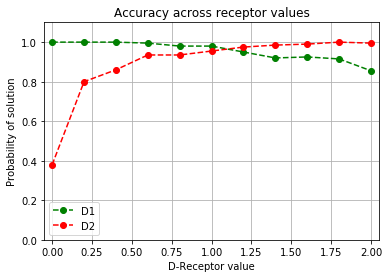

In [12]:
plt.axis([-0.05, 2.05, 0, 1.1])
plt.ylabel("Probability of solution")
plt.xlabel("D-Receptor value")
plt.title("Accuracy across receptor values")
d2y = [d2_res["%.1f" % x] for x in d_vals]
d1y = [d1_res["%.1f" % x] for x in d_vals]
plt.plot(d_vals, d1y, "o--", color="green")
plt.plot(d_vals, d2y, "o--", color="red")
plt.grid()
plt.legend(["D1", "D2"], loc="best")
plt.show()
#[f.lowbounded for f in fs.features]

In [25]:
p = rapm.Problem(4)
k = p.update(-1)
p.mean_dopamine(k)
print(p.simulate())

(12, [], -0.0022906234666666661)


In [17]:
# Full simulations
if FULL_SIMS:
    temp = 0.1
    anticorrelated = True
    lowbounded = True

    d_vals = [x / 100.0 for x in list(range(0, 201, 20))]

    F = (4, 5, 6, 7)
    C = (1, 2)
    R = (2, 3, 4)
    A = (0.1, 0.2, 0.3, 0.4)
    T = (100, 150, 200, 250)

    fstring = "%.3f," * 11
    fstring = fstring + "%.8f\n"
    output = open("simulations.txt", "w")
    output.write("NFeatures,NCorrect,NRules,Alpha,MaxTime,D1,D2,MaxTime,Time,SolutionsLeft,Solved,Activity\n")
    
    for f in F:
        for c in C:
            for r in R:
                for a in A:
                    for t in T:
                        for d1 in d_vals:
                            for d2 in d_vals:
                                # Setting up the problem solver
                                ps = rapm.Problem(nfeatures = f, ncorrect = c,  nrules = r, maxruns = t)
                                ps.alpha = a
                                ps.temperature = temp
                                ps.anticorrelated = anticorrelated
                                ps.lowbounded = lowbounded
                                ps.d1 = d1
                                ps.d2 = d2
                                
                                for n in range(nsims):
                                    time, solutions, activity = ps.simulate()
                                    s = 0
                                    ns = len(solutions)
                                    if ns == 0:
                                        s = 1
                                    data = (f, c, r, a, t, d1, d2, t, time, ns, s, activity)
                                    #print(data)
                                    #data = (float(x) for x in data)
                                    output.write(fstring % data)
                                    
    


NameError: name 'FULL_SIMS' is not defined

In [20]:
import rapm
print(rapm.SIMS_TEMPLATE_SE


temp = 0.1
anticorrelated = True
lowbounded = True

d_vals = [x / 100.0 for x in list(range(0, 201, 20))]

F = (4, 5, 6, 7)
C = (1)   # (1, 2)
R = (2)   # (2, 3, 4)
A = (3.00) # (0.1, 0.2, 0.3, 0.4) or (0.25, 0.5, 0.75, 0.1)
T = (100, 150, 200, 250)

fstring = "4.000," * 11
fstring = fstring + "5.00000000
"
output = open("simulations-C=6-R=7-A=8.txt", "w")
output.write("NFeatures,NCorrect,NRules,Alpha,MaxTime,D1,D2,MaxTime,Time,SolutionsLeft,Solved,Activity
")

for f in F:
    for c in C:
        for r in R:
            for a in A:
                for t in T:
                    for d1 in d_vals:
                        for d2 in d_vals:
                            ps = rapm.Problem(nfeatures = f, ncorrect = c,  nrules = r, maxruns = t)
                            ps.alpha = a
                            ps.temperature = temp
                            ps.anticorrelated = anticorrelated
                            ps.lowbounded = lowbounded
                            ps.d1 = d1
    

In [5]:
# Recreate the "Time" column
if FULL_SIMS:
    #nfeat = 6
    #ncorrect = 1
    #alpha = 0.1
    temp = 0.1
    nsims = 200
    anticorrelated = True
    nrules = 4
    #maxruns = 150
    lowbounded = True

    d_vals = [x / 100.0 for x in list(range(0, 201, 20))]

    F = (4, 5, 6, 7)
    C = (1, 2)
    R = (2, 3, 4)
    A = (0.1, 0.2, 0.3, 0.4)
    T = (100, 150, 200, 250)

    output = open("time.txt", "w")
    output.write("MaxTime\n")
    
    for f in F:
        for c in C:
            for r in R:
                for a in A:
                    for t in T:
                        for d1 in d_vals:
                            for d2 in d_vals:
                                # Setting up the problem solver
                                
                                for n in range(nsims):
                                    output.write("%d\n" % t)
                                    output.flush()
